In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os #used os in this code to get the data path for loading images when resizing them

In [2]:
import cv2

In [3]:
Data_directory = "C:\\Users\Ramy\.keras\datasets\PetImages"
Categories =["Dog", "Cat"] # array: 0 is dog, 1 is cat

In [4]:
image_file = Data_directory + '\\Dog\\67.jpg'
image_file

'C:\\Users\\Ramy\\.keras\\datasets\\PetImages\\Dog\\67.jpg'

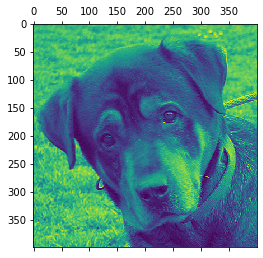

In [5]:
#reading the image as grayscale from CV library
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
plt.matshow(image)
#if you want to show the image using openCV only, then you can use the following code
# cv2.imshow('image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows

In [6]:
print(image) # if we print the image, we see a grayscale data points in array

[[161 164 169 ... 188 175 178]
 [156 160 168 ... 184 176 181]
 [171 173 177 ... 182 179 185]
 ...
 [147 122 161 ...  74  87  98]
 [176 136 145 ...  35  35  42]
 [189 145 127 ...  60  51  44]]


In [7]:
print(image.shape) # as noticed all images have different shapes, so we normalise the sizes by normalizing the size

(400, 400)


In [8]:
images_size = 50
new_image_size = cv2.resize(image, (images_size, images_size)) # we can size all images if the processor can't process higher resol. images

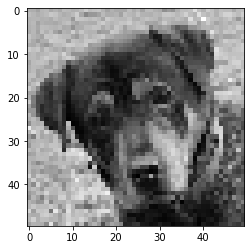

In [9]:
plt.imshow(new_image_size, cmap ='gray')
plt.show()

In [10]:
#creating Training data
training_data = []
def training_data_func():
    for category in Categories:
        path = os.path.join(Data_directory, category)
        class_number = Categories.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(image_array,(images_size,images_size))
                training_data.append([new_array,class_number])
            except Exception as e:
                pass

In [11]:
training_data_func()

In [12]:
len(training_data)

24946

In [13]:
import random #to shuffle data because i want to shuffle their order

In [14]:
random.shuffle(training_data)

In [15]:
#print the label of data 
for sample in training_data[0:10]:
    print(sample[1])

1
1
0
0
1
1
0
1
1
1


In [16]:
X = [] # features
Y = [] # label

In [17]:
for features, labels in training_data: # training_data is the new data appended to the array after resizing
    X.append(features)
    Y.append(labels)

In [18]:
Y = np.array(Y)
print(Y)

[1 1 0 ... 0 1 0]


In [19]:
Y = Y.reshape(-1, 1)


In [20]:
print(Y)

[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


In [21]:
#converting to np
X = np.array(X)
print(X[0:5])

[[[ 28  29  28 ...  32  32  32]
  [ 28  32  32 ...  36  36  32]
  [ 32  32  32 ...  36  36  32]
  ...
  [206 212 208 ... 156 122  52]
  [205 201 202 ... 145  25 153]
  [195 199 192 ...  13 133 149]]

 [[255 251 255 ...   5  91   8]
  [255 252 255 ...  45 111 116]
  [255 254 251 ...  53  30  70]
  ...
  [153 166 138 ... 110 135  25]
  [170 123 147 ... 121  19 104]
  [141 149  68 ...  28 113 116]]

 [[117  98  83 ... 217 220  75]
  [114  98  83 ...  98 177 190]
  [113 102  85 ...  88 178 194]
  ...
  [197 197 194 ... 223 225 228]
  [196 187 176 ... 215 226 223]
  [203 190 194 ... 217 227 209]]

 [[  2   3   3 ... 191 187 184]
  [  2   2   5 ... 189 188 178]
  [  2   2  11 ... 164 176  61]
  ...
  [113 117 127 ...   9 139 129]
  [112 119 126 ...  11 139 131]
  [112 121 123 ...  11 143 135]]

 [[242 244 246 ... 192 188 187]
  [243 244 246 ... 192 190 187]
  [244 246 245 ... 192 190 188]
  ...
  [137  99 142 ... 188 154 107]
  [130 177 174 ... 185 172  83]
  [165 174 176 ... 169 174  91]]]


In [22]:
# reshape the images to 1D array
# -1 for size
# 1 to gray scale
X = X.reshape(-1, images_size, images_size, 1)
print(X[0:5])

[[[[ 28]
   [ 29]
   [ 28]
   ...
   [ 32]
   [ 32]
   [ 32]]

  [[ 28]
   [ 32]
   [ 32]
   ...
   [ 36]
   [ 36]
   [ 32]]

  [[ 32]
   [ 32]
   [ 32]
   ...
   [ 36]
   [ 36]
   [ 32]]

  ...

  [[206]
   [212]
   [208]
   ...
   [156]
   [122]
   [ 52]]

  [[205]
   [201]
   [202]
   ...
   [145]
   [ 25]
   [153]]

  [[195]
   [199]
   [192]
   ...
   [ 13]
   [133]
   [149]]]


 [[[255]
   [251]
   [255]
   ...
   [  5]
   [ 91]
   [  8]]

  [[255]
   [252]
   [255]
   ...
   [ 45]
   [111]
   [116]]

  [[255]
   [254]
   [251]
   ...
   [ 53]
   [ 30]
   [ 70]]

  ...

  [[153]
   [166]
   [138]
   ...
   [110]
   [135]
   [ 25]]

  [[170]
   [123]
   [147]
   ...
   [121]
   [ 19]
   [104]]

  [[141]
   [149]
   [ 68]
   ...
   [ 28]
   [113]
   [116]]]


 [[[117]
   [ 98]
   [ 83]
   ...
   [217]
   [220]
   [ 75]]

  [[114]
   [ 98]
   [ 83]
   ...
   [ 98]
   [177]
   [190]]

  [[113]
   [102]
   [ 85]
   ...
   [ 88]
   [178]
   [194]]

  ...

  [[197]
   [197]
   [194]
   

### Applying CNN after preparing the data

In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [24]:
#Normalizing the images for the CNN
X = X /255.0

In [25]:
X.shape

(24946, 50, 50, 1)

In [55]:
Y.shape

(24946, 1)

In [26]:
X.shape[1:]

(50, 50, 1)

In [27]:
model = Sequential()
# Adding layers part 1
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
#pooling : its used for minimizing the feature maps in the images (part of CNN)
model.add(MaxPooling2D(pool_size = (2,2)))

In [28]:
#adding layers p2 
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

In [29]:
# adding layers p3
model.add(Flatten())
model.add(Dense(64))

# output layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [75]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

In [83]:
from sklearn.model_selection import train_test_split # from sklearn library, we can create training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [85]:
len(X_train)

19956

In [93]:
len(X_test)

4990

In [87]:
model.fit(X_train, Y_train, batch_size = 100, epochs = 1)

200/200 [==============================] - 56s 278ms/step - loss: 0.3888 - accuracy: 0.8254


In [88]:
predictor = model.predict(X_test)

In [89]:
predictor[4]

array([0.6038888], dtype=float32)

In [90]:
predictor[4].shape

(1,)

In [91]:
Y_test[4]

array([1])

In [92]:
model.evaluate(X_test, Y_test)

156/156 [==============================] - 4s 26ms/step - loss: 0.4327 - accuracy: 0.8104


[0.4327479600906372, 0.8104208707809448]